In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read City data file and store it as dataframe
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get columns and rows of city data that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get unique values for each type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [ ]:
# Get number of data points from urban city type
sum(city_data_df['type']== 'Urban')

In [ ]:
# Get number of data points from suburban city type
sum(city_data_df['type']== 'Suburban')

In [ ]:
# Get number of data points from rural city type
sum(city_data_df['type']== 'Rural')

In [8]:
# Get columns and rows that are not null from ride data
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [ ]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

In [9]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [10]:
# Merge ride and city dataframes, left merge, on city column index
pyber_data_df= pd.merge(ride_data_df,city_data_df, how= "left", on=['city', 'city'])
# Display new merged dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
# Create urban cities dataframe
urban_cities_df= pyber_data_df[pyber_data_df['type']== 'Urban']

In [19]:
# Create suburban and rural dataframes
suburban_cities_df= pyber_data_df[pyber_data_df['type']== 'Suburban']
rural_cities_df= pyber_data_df[pyber_data_df['type']== 'Rural']

In [22]:
# Use .groupby to create series with number of rides for urban cities
urban_ride_count= urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [23]:
# Create series for number of rides in suburban cities using .groupby using cities as index
suburban_ride_count= suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [25]:
# Create series for number of rides in rural cities using .groupby with cities as index
rural_ride_count= rural_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [28]:
# Get average fare for all cities of each type using .groupby, with city as the index and .mean()['fare'] as value
urban_avg_fare= urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare= suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare= rural_cities_df.groupby(['city']).mean()['fare']
print(urban_avg_fare.head())
print(suburban_avg_fare.head())
print(rural_avg_fare.head())

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64
city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64
city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64


In [29]:
# Get average number of drivers for all cities of each type using .groupby, with city as the index and .mean()['driver_count']
urban_driver_count= urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count= suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count= rural_cities_df.groupby(['city']).mean()['driver_count']

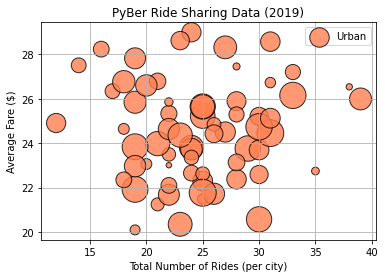

In [34]:
# Now that we have created 1. datasets for each city type, 2. average fare for each city in each type
# and 3. average drivers in each city of each type
# Create bubble chart for each city type, starting with Urban at this step
plt.scatter(urban_ride_count,urban_avg_fare, s=10*urban_driver_count, 
            c='coral', edgecolor= 'black', linewidths=1,
            alpha= .8, label= "Urban")
plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (per city)")
plt.grid(True)
# Add Legend
plt.legend()
            

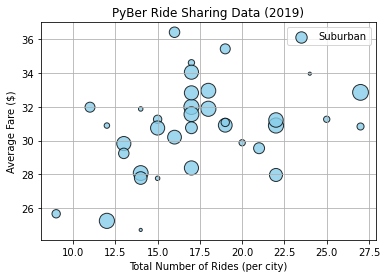

In [35]:
# Create Suburban bubble chart
plt.scatter(suburban_ride_count,suburban_avg_fare, s=10*suburban_driver_count,
           c="skyblue", edgecolor= "black", linewidths=1,
           alpha=.8, label= "Suburban")
plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (per city)")
plt.grid(True)
# Add Legend
plt.legend()

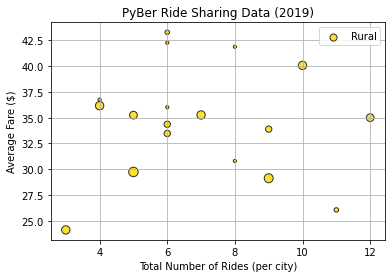

In [36]:
# Create Rural bubble Chart
plt.scatter(rural_ride_count,rural_avg_fare,s= 10*rural_driver_count,
           c="gold", edgecolor= "black", linewidths=1,
           alpha=.8, label= "Rural")
plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (per city)")
plt.grid(True)
# Add Legend
plt.legend()

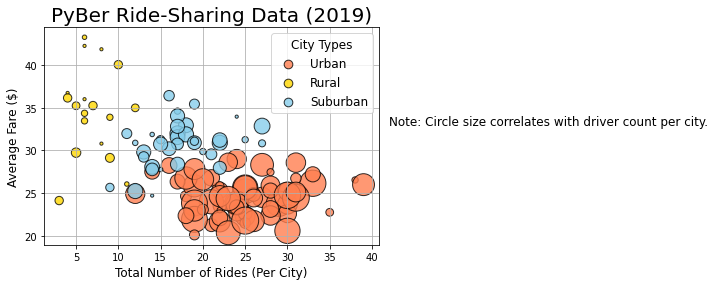

<Figure size 432x288 with 0 Axes>

In [44]:
# Combine previous three charts into one
plt.scatter(urban_ride_count,urban_avg_fare, s=10*urban_driver_count, 
            c='coral', edgecolor= 'black', linewidths=1,
            alpha= .8, label= "Urban")
plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (per city)")
plt.grid(True)

plt.scatter(rural_ride_count,rural_avg_fare,s= 10*rural_driver_count,
           c="gold", edgecolor= "black", linewidths=1,
           alpha=.8, label= "Rural")
plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (per city)")
plt.grid(True)

plt.scatter(suburban_ride_count,suburban_avg_fare, s=10*suburban_driver_count,
           c="skyblue", edgecolor= "black", linewidths=1,
           alpha=.8, label= "Suburban")
plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (per city)")
plt.grid(True)

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add Legend
plt.legend()

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 33, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Show the plot
plt.show()
# Save the figure.
plt.savefig("analysis/Fig1.png")